In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn

In [61]:
df_mysql = pd.read_excel('Query_Results_for_Submission.xlsx','mysql')
df_mongo = pd.read_excel('Query_Results_for_Submission.xlsx','Mongo')
df_mongo_s = df_mongo/1000 # convert from milliseconds to seconds.

In [5]:
df_mongo.head() #it's in millisecond, while mysql is in second.

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,1113,305,7781,264,264,538,360,569,383,3161,379,2991,596,524,709,668,330,673,3162,13251
1,459,304,2900,267,261,539,402,543,357,3065,367,3013,575,542,681,683,293,675,3041,12817
2,328,304,2965,267,263,545,299,545,346,3079,374,3054,575,525,668,695,290,679,2991,13380
3,312,316,2929,266,268,544,301,543,356,3062,382,3097,565,528,727,667,289,671,2989,13367
4,346,309,2861,268,271,542,306,549,351,3070,361,3026,569,520,757,688,350,745,3009,13150


In [6]:
df_mongo_s.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,1.113,0.305,7.781,0.264,0.264,0.538,0.360,0.569,0.383,3.161,0.379,2.991,0.596,0.524,0.709,0.668,0.330,0.673,3.162,13.251
1,0.459,0.304,2.900,0.267,0.261,0.539,0.402,0.543,0.357,3.065,0.367,3.013,0.575,0.542,0.681,0.683,0.293,0.675,3.041,12.817
2,0.328,0.304,2.965,0.267,0.263,0.545,0.299,0.545,0.346,3.079,0.374,3.054,0.575,0.525,0.668,0.695,0.290,0.679,2.991,13.380
3,0.312,0.316,2.929,0.266,0.268,0.544,0.301,0.543,0.356,3.062,0.382,3.097,0.565,0.528,0.727,0.667,0.289,0.671,2.989,13.367
4,0.346,0.309,2.861,0.268,0.271,0.542,0.306,0.549,0.351,3.070,0.361,3.026,0.569,0.520,0.757,0.688,0.350,0.745,3.009,13.150


In [7]:
df_mysql.head()

,1_1,1_2,1_3,1_4,2_1,2_2,2_3,2_4,3_1,3_2,...,5_9,5_10,5_11,5_12,5_13,6_1,6_2,6_3,7_1,7_2
0,29.199869,22.203696,32.828821,38.562893,23.486208,23.214658,31.663724,30.862653,23.180177,19.890588,...,32.685639,29.938790,19.795492,37.978156,20.161279,37.762560,37.031058,39.859892,31.321851,196.876950
1,30.111846,23.755523,34.228596,36.945263,23.546418,23.303967,30.457967,31.236271,22.666101,18.896129,...,32.670926,29.954087,19.457317,33.053032,21.421276,36.961469,34.409978,39.610724,31.222946,195.866008
2,23.664451,20.190555,31.550422,36.661165,23.604791,23.674340,31.136473,31.439254,21.942268,19.061409,...,32.467419,29.639436,19.531684,30.943911,19.835303,37.148687,38.870196,39.458079,30.944016,230.650158
3,23.539224,21.822382,39.933461,37.100136,23.326783,23.439363,30.783950,31.125232,21.934105,19.247378,...,32.661562,30.021639,19.874067,38.053743,22.139979,37.182856,41.361933,38.767535,31.038925,254.728120
4,22.890971,20.144736,31.297709,37.115212,23.204108,23.552040,30.419731,31.159320,22.427782,18.983889,...,32.627152,29.467261,19.627182,37.229124,19.970458,37.322337,35.773907,40.235084,30.698429,205.526657


### Plot the data and find sharp fluctuations in the image

In [8]:
# def plot function
def plot_mysql(location_start,location_end,title_word):
    for key, value in df_mysql.iloc[:,location_start:location_end].items():
        plt.plot(df_mysql[key], label = 'mysql'+key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with mysql')
    plt.show()
    
def Plot_mongo(location_start,location_end,title_word):
    for key, value in df_mongo_s.iloc[:,location_start:location_end].items():
        plt.plot(df_mongo_s[key], label = key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with MongoDB')
    plt.show()

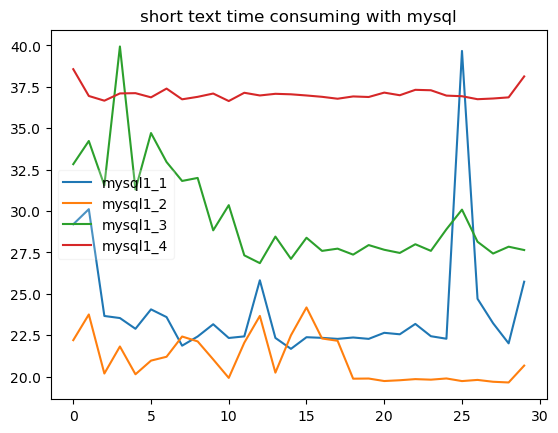

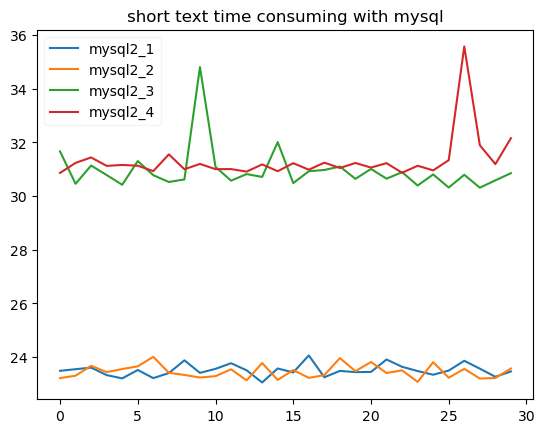

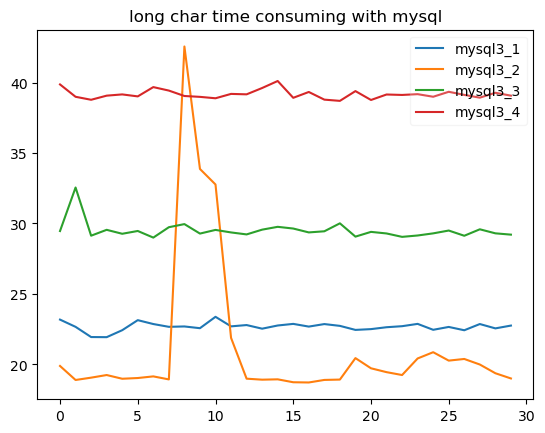

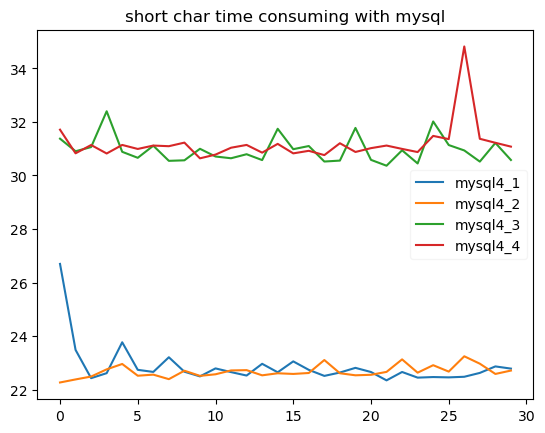

In [9]:
# plot part 1~4 for showing the results, and compare with after data cleaning
plot_mysql(0,4,'short text')
plot_mysql(4,8,'short text')
plot_mysql(8,12,'long char')
plot_mysql(12,16,'short char')

temp = {}
temp['mysql1_1'] = df_mysql['1_1'].copy()
temp['mysql1_3'] = df_mysql['1_3'].copy()
temp['mysql3_2'] = df_mysql['3_2'].copy()

##### It is obvious that sharp fluctuations appears in the Plots, especially for long text plot. Even if we expand the data 30 times, the outliers may change the result sharply. So, we tried to eliminate the outliers.

### Eliminate outliers and replace them with median, because we believe the mean may not be that accurate here.

In [63]:
# data cleaning with mysql using quantile.
for column in df_mysql.columns:
    median = df_mysql[column].median()
    Q1 = df_mysql[column].quantile(0.25)
    Q3 = df_mysql[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_mysql.loc[(df_mysql[column] < lower_bound) | (df_mysql[column] > upper_bound), column] = median

# print(df_mysql)

# # output
# df = pd.DataFrame(df_mysql)
# file_name = 'output_without_outlier.xlsx' 
# sheet_name = 'mysql'

# with pd.ExcelWriter(file_name, engine='openpyxl', mode='a') as writer: 
#     df.to_excel(writer, sheet_name=sheet_name, index=False)

In [11]:
# temp1 = pd.DataFrame(temp)

# print(temp1.head())

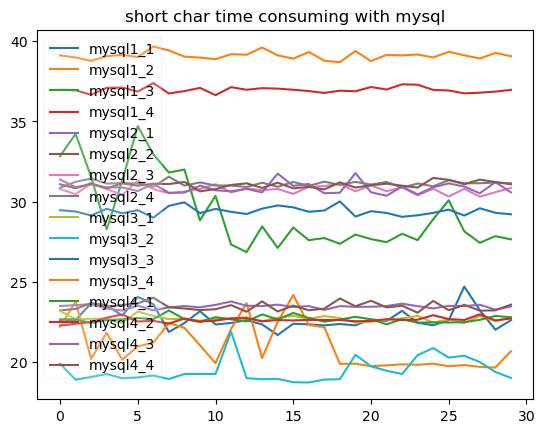

In [64]:
## It's a plot part for observe the results.

# plot_mysql(0,4,'long text')
# plot_mysql(4,8,'short text')
# plot_mysql(8,12,'long char')
# plot_mysql(12,16,'short char')

# temp['mysql1_1_u'] = df_mysql['1_1']
# temp['mysql1_3_u'] = df_mysql['1_3']
# temp['mysql3_2_u'] = df_mysql['3_2']

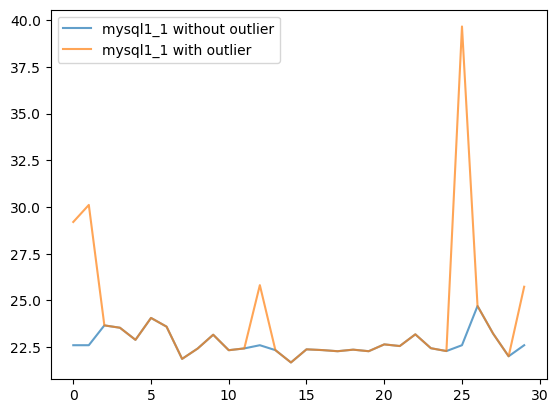

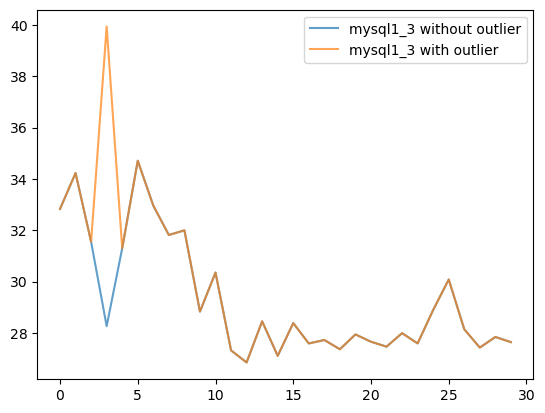

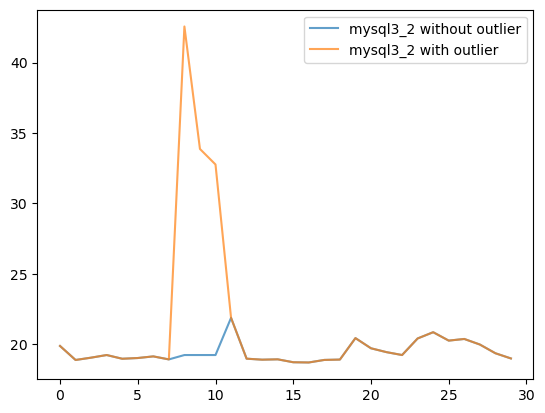

23.97502733333333 22.724675933333327
21.186747523333334 19.471743471666667


In [60]:
plt.plot(temp['mysql1_1_u'], label = 'mysql1_1 without outlier',alpha=0.7)
plt.plot(temp['mysql1_1'], label = 'mysql1_1 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql1_3_u'], label = 'mysql1_3 without outlier',alpha=0.7)
plt.plot(temp['mysql1_3'], label = 'mysql1_3 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql3_2_u'], label = 'mysql3_2 without outlier',alpha=0.7)
plt.plot(temp['mysql3_2'], label = 'mysql3_2 with outlier',alpha=0.7)
plt.legend()
plt.show()
print(temp['mysql1_1'].mean(),temp['mysql1_1_u'].mean())
print(temp['mysql3_2'].mean(),temp['mysql3_2_u'].mean())

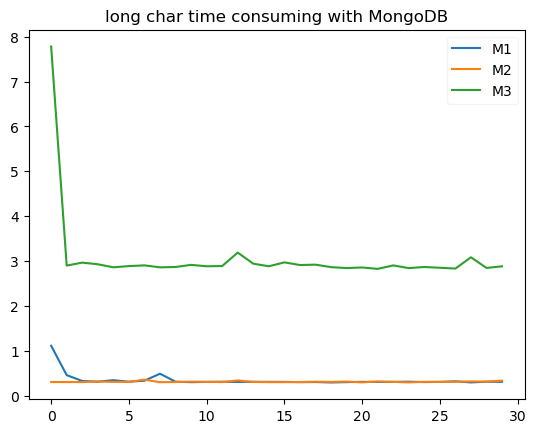

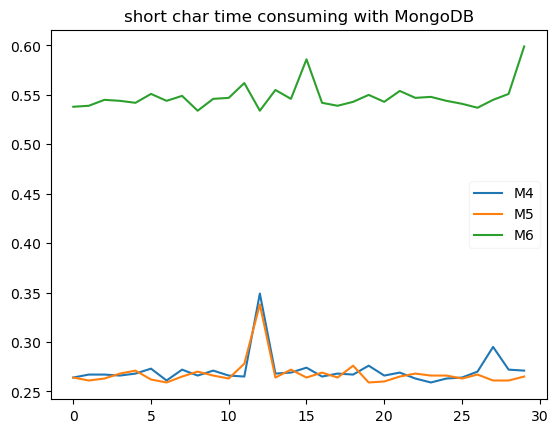

In [14]:
#chart before data cleaning for mongo
Plot_mongo(0,3,'long char')
Plot_mongo(3,6,'short char')

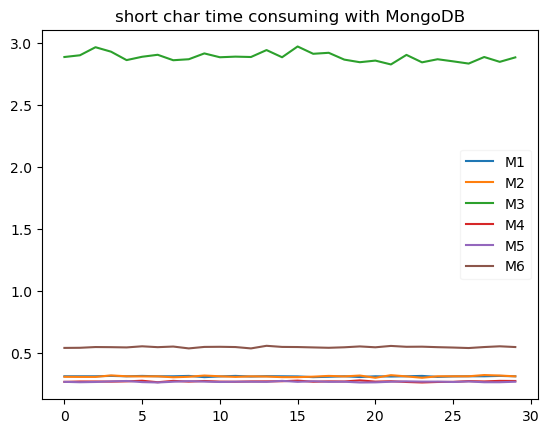

In [117]:
for column in df_mongo_s.columns:
    median = df_mongo_s[column].median()
    Q1 = df_mongo_s[column].quantile(0.25)
    Q3 = df_mongo_s[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_mongo_s.loc[(df_mongo_s[column] < lower_bound) | (df_mongo_s[column] > upper_bound), column] = median

Plot_mongo(0,3,'long char')
Plot_mongo(3,6,'short char')

# output
# df = pd.DataFrame(df_mongo_s)
# file_name = 'output_without_outlier.xlsx' 
# sheet_name = 'Mongo'

# with pd.ExcelWriter(file_name, engine='openpyxl', mode='a') as writer: 
#     df.to_excel(writer, sheet_name=sheet_name, index=False)

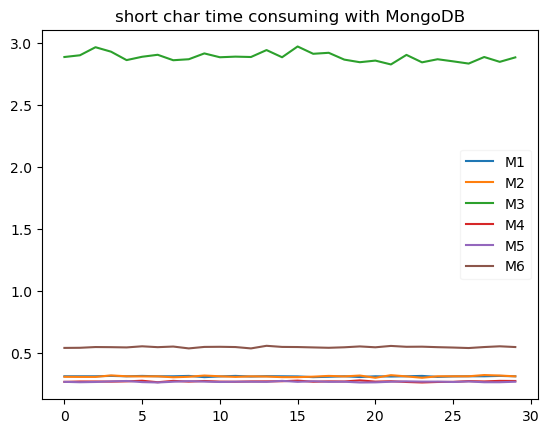

In [118]:
# # for check agian 
# Plot_mongo(0,3,'long char')
# Plot_mongo(3,6,'short char')

### 1. analyze part 1~4 one by one

##### 1.1 mysql part

In [16]:
# redefine plot function without show function
def plot_mysql(location_start,location_end,title_word):
    for key, value in df_mysql.iloc[:,location_start:location_end].items():
        plt.plot(df_mysql[key], label = 'mysql'+key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with mysql')
    
def Plot_mongo(location_start,location_end,title_word):
    for key, value in df_mongo_s.iloc[:,location_start:location_end].items():
        plt.plot(df_mongo_s[key], label = key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with MongoDB')

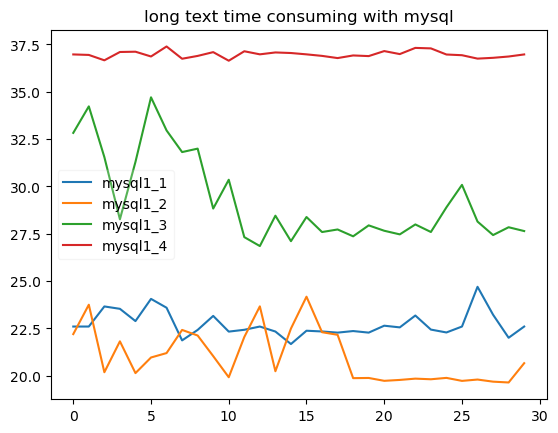

The result is obvious for sql_query 1-3 and 1-4, which is long text


In [17]:
plot_mysql(0,4,'long text')
plt.show()
print("The result is obvious for sql_query 1-3 and 1-4, which is long text")

In [18]:
# t test for 1-1 and 1-2
def t_test(x,y): 
    print(x.mean(),y.mean())
    t_statistic, p_value = stats.ttest_ind(x, y)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    if p_value > 0.05:
        print("There's no significant difference between two data set.")

def one_t_test(x,y):
    t_stat, p_value = stats.ttest_ind(x,y, alternative='greater')
    # significant level
    alpha = 0.05
    if p_value < alpha:
        print("{} is significantly greater than {}".format(x.name,y.name))
    else:
        print("It is not significantly greater.")

t_test(df_mysql['1_1'], df_mysql['1_2'])
one_t_test(df_mysql['1_1'], df_mysql['1_2'])
# Then it shows that the query 1_1 statistically significantly takes more time than 1_2, as One-tailed p-value much less than 0.05.

22.724675933333327 21.044109846666668
t-statistic: 5.984907675479177
p-value: 1.4433243846988411e-07
1_1 is significantly greater than 1_2


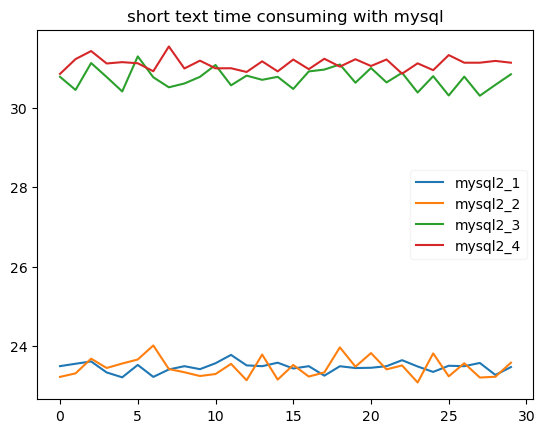

The result is obvious for sql_query 2-1 and 2-2 to 2-3 and 2-4, which is short text


In [19]:
plot_mysql(4,8,'short text')
plt.show()
print("The result is obvious for sql_query 2-1 and 2-2 to 2-3 and 2-4, which is short text")

In [20]:
# t test for 2-1 and 2-2 

t_test(df_mysql['2_1'], df_mysql['2_2'])
# It shows that the difference is not significant, the two set can be said equal.

23.460891973333336 23.453124883333334
t-statistic: 0.15200832260565705
p-value: 0.87970790585131
There's no significant difference between two data set.


In [21]:
# t test for 2-3 and 2-4

t_test(df_mysql['2_3'], df_mysql['2_4'])
one_t_test(df_mysql['2_4'],df_mysql['2_3'])

30.743766759999993 31.119823911666668
t-statistic: -6.916382632537941
p-value: 4.049568844009407e-09
2_4 is significantly greater than 2_3


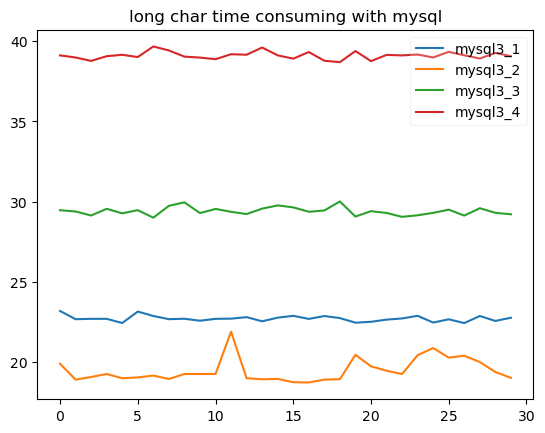

The relationship is obvious for all queries.


In [22]:
plot_mysql(8,12,'long char')
plt.show()
print("The relationship is obvious for all queries.")

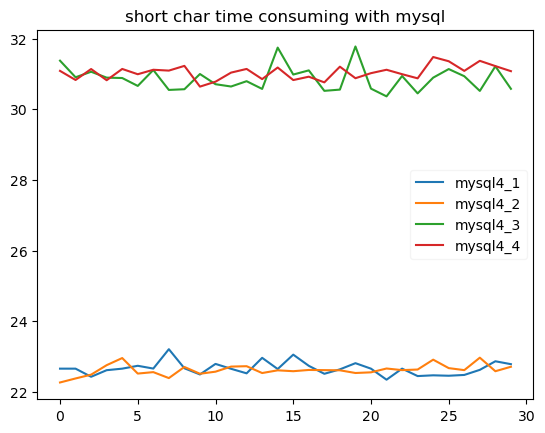

In [23]:
plot_mysql(12,16,'short char')
plt.show()

In [24]:
t_test(df_mysql['4_2'], df_mysql['4_1'])
# one_t_test(df_mysql['2_4'],df_mysql['2_3'])

22.6219801 22.665880646666665
t-statistic: -0.9870455151282153
p-value: 0.3277202010484719
There's no significant difference between two data set.


In [25]:
t_test(df_mysql['4_3'], df_mysql['4_4'])
one_t_test(df_mysql['4_4'],df_mysql['4_3'])

30.86763833333334 31.04246746
t-statistic: -2.380405476689889
p-value: 0.020600193211073106
4_4 is significantly greater than 4_3


##### comparation between them

1_ represent long text, 2_ represent short text.


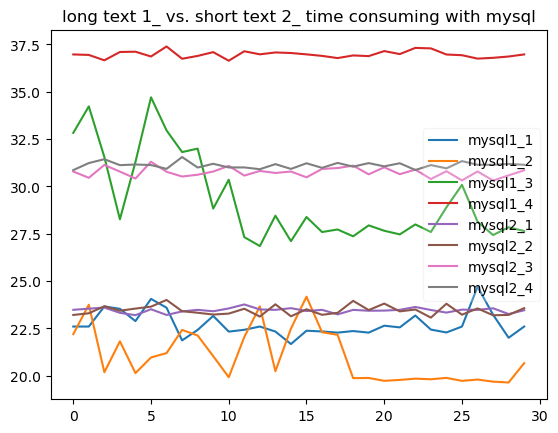

In [26]:
# long text vs short text
print("1_ represent long text, 2_ represent short text.")
plot_mysql(0,8,'long text 1_ vs. short text 2_')
plt.show()

In [27]:
t_test(df_mysql['1_1'], df_mysql['2_1'])
one_t_test(df_mysql['2_1'],df_mysql['1_1'])
one_t_test(df_mysql['2_2'],df_mysql['1_1'])

22.724675933333327 23.460891973333336
t-statistic: -5.998021286328446
p-value: 1.3732359976468474e-07
2_1 is significantly greater than 1_1
2_2 is significantly greater than 1_1


3_ represent long varchar, 4_ represent short varchar.


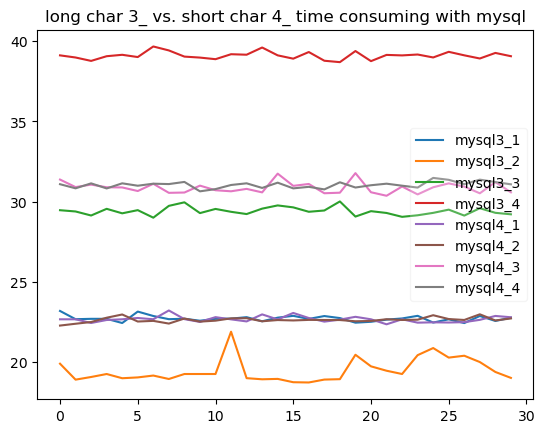

In [28]:
# long varchar vs. short varchar
print("3_ represent long varchar, 4_ represent short varchar.")
plot_mysql(8,16,'long char 3_ vs. short char 4_')
plt.show()

In [29]:
t_test(df_mysql['3_1'], df_mysql['4_1'])
t_test(df_mysql['3_1'], df_mysql['4_2'])
# one_t_test(df_mysql['2_1'],df_mysql['1_1'])
# one_t_test(df_mysql['2_2'],df_mysql['1_1'])

22.704437443333333 22.665880646666665
t-statistic: 0.8027695802860274
p-value: 0.42538533026857084
There's no significant difference between two data set.
22.704437443333333 22.6219801
t-statistic: 1.8935727930153337
p-value: 0.06327326810719944
There's no significant difference between two data set.


1_ represent long text, 3_ represent short char.


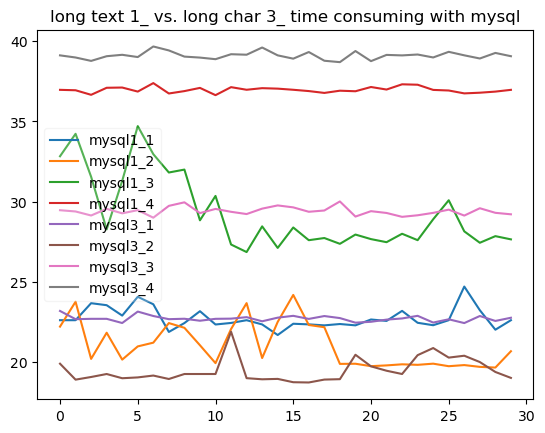

In [30]:
# long text 1_ vs. long char 3_
print("1_ represent long text, 3_ represent short char.")
plot_mysql(0,4,'')
plot_mysql(8,12,'long text 1_ vs. long char 3_')
plt.show()

1_ represent long text, 3_ represent long char.


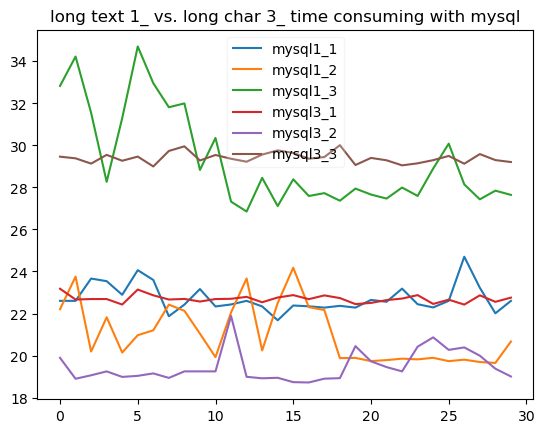

In [31]:
# long text 1_ vs. long char 3_
print("1_ represent long text, 3_ represent long char.")
plot_mysql(0,3,'')
plot_mysql(8,11,'long text 1_ vs. long char 3_')
plt.show()

In [32]:
t_test(df_mysql['1_1'], df_mysql['3_1'])

22.724675933333327 22.704437443333333
t-statistic: 0.16172464985535148
p-value: 0.8720847587591767
There's no significant difference between two data set.


In [33]:
t_test(df_mysql['1_2'], df_mysql['3_2'])
one_t_test(df_mysql['1_2'],df_mysql['3_2'])

21.044109846666668 19.471743471666667
t-statistic: 5.469103580847898
p-value: 1.00351671645777e-06
1_2 is significantly greater than 3_2


In [34]:
t_test(df_mysql['1_3'], df_mysql['3_3'])

29.279327568333333 29.404865245
t-statistic: -0.2978802831576808
p-value: 0.7668589865964713
There's no significant difference between two data set.


2_ represent short text, 4_ represent short varchar.


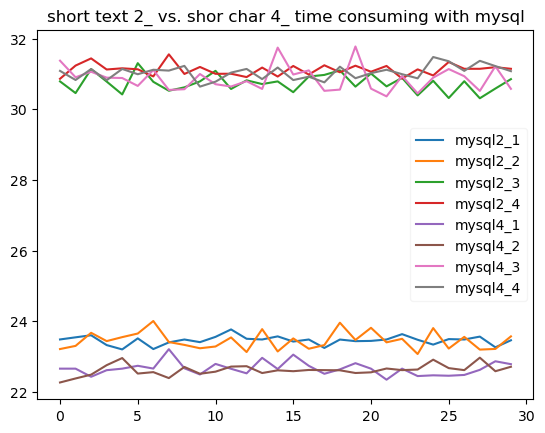

In [35]:
# short text 2_ vs. short char 4_
print("2_ represent short text, 4_ represent short varchar.")
plot_mysql(4,8,'')
plot_mysql(12,16,'short text 2_ vs. shor char 4_')
plt.show()

In [36]:
t_test(df_mysql['2_3'], df_mysql['4_3'])
t_test(df_mysql['2_4'],df_mysql['4_4'])
# one_t_test(df_mysql['2_4'],df_mysql['4_4'])

30.743766759999993 30.86763833333334
t-statistic: -1.5748290288317548
p-value: 0.12073538493073419
There's no significant difference between two data set.
31.119823911666668 31.04246746
t-statistic: 1.6630824332331553
p-value: 0.10169109106258299
There's no significant difference between two data set.


##### 1.2 Mongo part 1~4

2.035264797507788 9.355884577974711
Apparently regex run much more time comparing with equal or in, like about 2~9 times,according to the length of the text.


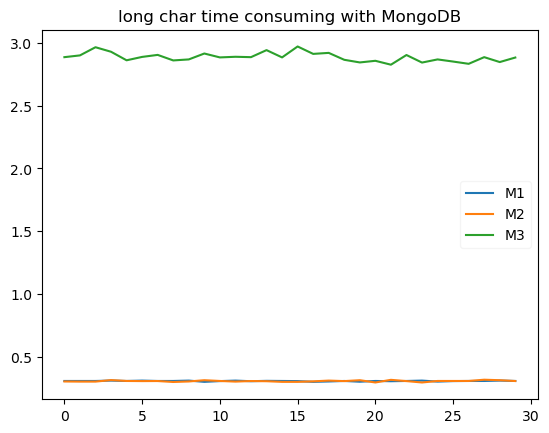

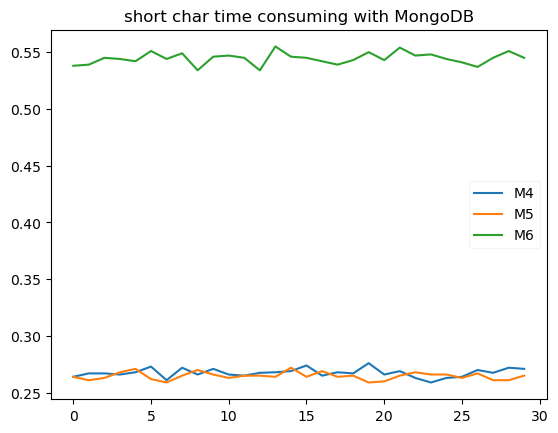

In [37]:
# apparently regex run much more time comparing with equal or in, like about 2~9 times,according to the length of the text.
print(df_mongo_s.iloc[:,5].mean()/df_mongo_s.iloc[:,3].mean(),df_mongo_s.iloc[:,2].mean()/df_mongo_s.iloc[:,0].mean())
print('Apparently regex run much more time comparing with equal or in, like about 2~9 times,according to the length of the text.')

Plot_mongo(0,3,'long char')
plt.show()
Plot_mongo(3,6,'short char')
plt.show()

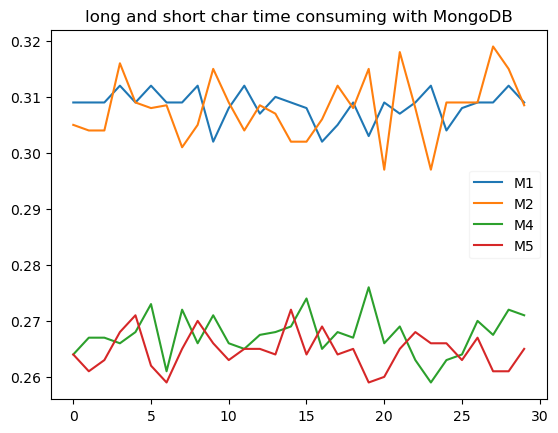

In [38]:
Plot_mongo(0,2,'long char')
Plot_mongo(3,5,'long and short char')
plt.show()

In [39]:
# t test for M1 and M2
t_test(df_mongo_s['M1'], df_mongo_s['M2'])

0.3084333333333333 0.30795
t-statistic: 0.42617036362940275
p-value: 0.6715612069418787
There's no significant difference between two data set.


In [40]:
# t test for M1 and M2
t_test(df_mongo_s['M4'], df_mongo_s['M5'])
one_t_test(df_mongo_s['M4'], df_mongo_s['M5'])

0.26750000000000007 0.26470000000000005
t-statistic: 3.0333369652045032
p-value: 0.0036146229113694387
M4 is significantly greater than M5


The plot is clear for the relationships.


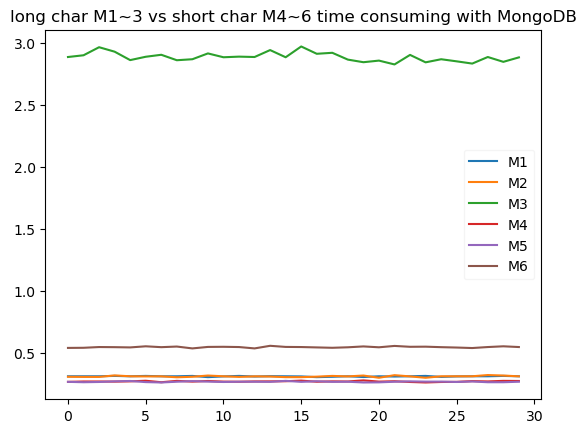

In [41]:
# between long char M1~M3 and short char M4~M6
print('The plot is clear for the relationships.')
Plot_mongo(0,6,'long char M1~3 vs short char M4~6')

##### 1.3 Analyze part 1~4 between database

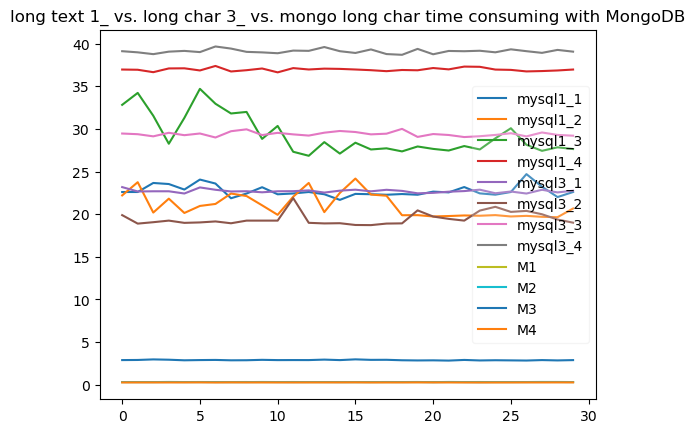

In [42]:
plot_mysql(0,4,'long text 1_ vs. long char 3_ vs. mongo long char')
plot_mysql(8,12,'long text 1_ vs. long char 3_ vs. mongo long char')
Plot_mongo(0,4,'long text 1_ vs. long char 3_ vs. mongo long char')
plt.show()

In [43]:
times = {}
times['1_s1'] = df_mysql['1_1'].mean()/df_mongo_s['M1'].mean()
times['1_s3'] = df_mysql['3_1'].mean()/df_mongo_s['M1'].mean()
times['2_s1'] = df_mysql['1_2'].mean()/df_mongo_s['M2'].mean()
times['2_s3'] = df_mysql['3_2'].mean()/df_mongo_s['M2'].mean()
times['3_s1'] = df_mysql['1_3'].mean()/df_mongo_s['M3'].mean()
times['3_s3'] = df_mysql['3_3'].mean()/df_mongo_s['M3'].mean()
times['4_s1'] = df_mysql['1_4'].mean()/df_mongo_s['M4'].mean()
times['4_s3'] = df_mysql['3_4'].mean()/df_mongo_s['M4'].mean()
# print(times)

max_value = max(times.values())
max_label = [key for key, value in times.items() if value == max_value][0]

min_value = min(times.values())
min_label = [key for key, value in times.items() if value == min_value][0]

average_value = sum(times.values()) / len(times)
print('Average multiple:',average_value,'\n',"Times range from mysql{}_{}-M{}: {} to mysql{}_{}-M{}: {}".format(min_label[-1],min_label[0],min_label[0],min_value, max_label[-1],max_label[0],max_label[0], max_value))

Average multiple: 72.95071502315618 
 Times range from mysql1_3-M3: 10.1464690660737 to mysql3_4-M4: 146.2044566604361


### Part 5

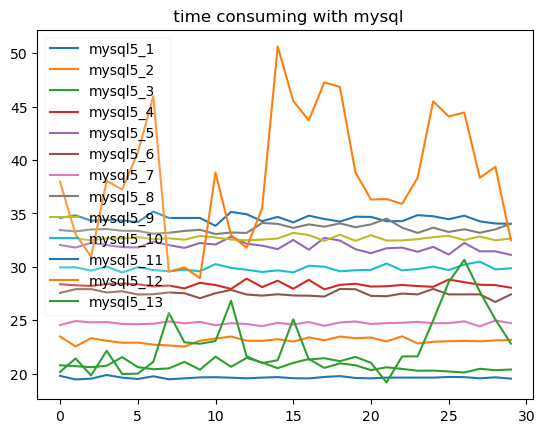

In [66]:
plot_mysql(16,29,'')
plt.show()

##### 5.1 mysql part 5

##### 5.1.1 comparation within

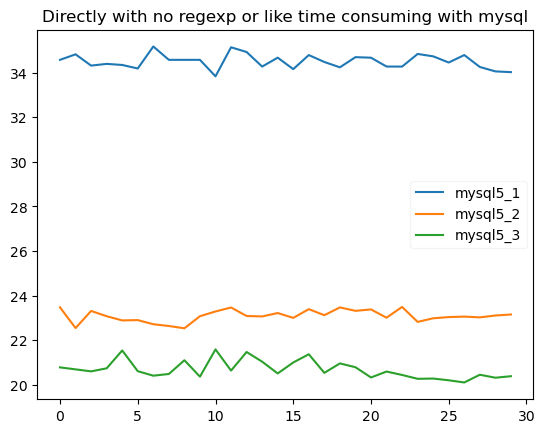

In [74]:
# directly with operator not, and, or
plot_mysql(16,19,'Directly with no regexp or like')
plt.show()

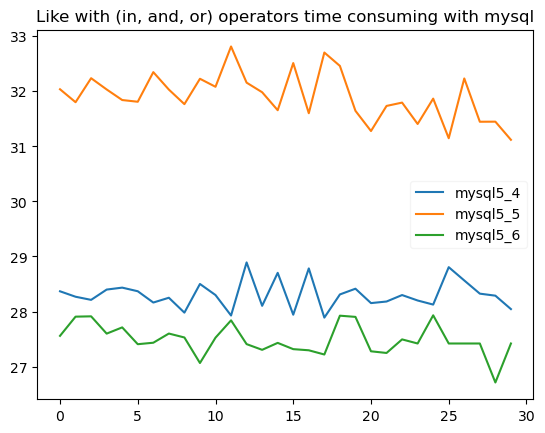

In [73]:
# Like with operator not, and, or
plot_mysql(19,22,'Like with (in, and, or) operators')
plt.show()

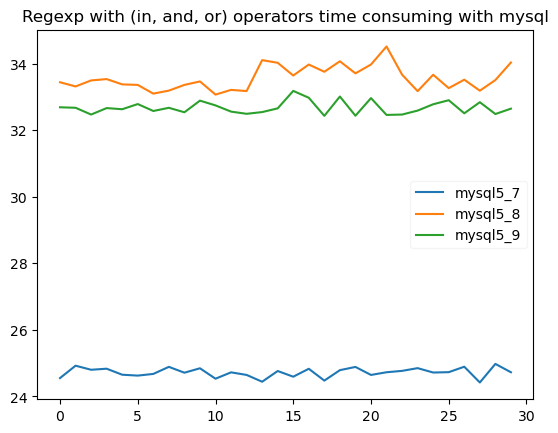

In [72]:
# regexp with operator not, and, or
plot_mysql(22,25,'Regexp with (in, and, or) operators')
plt.show()

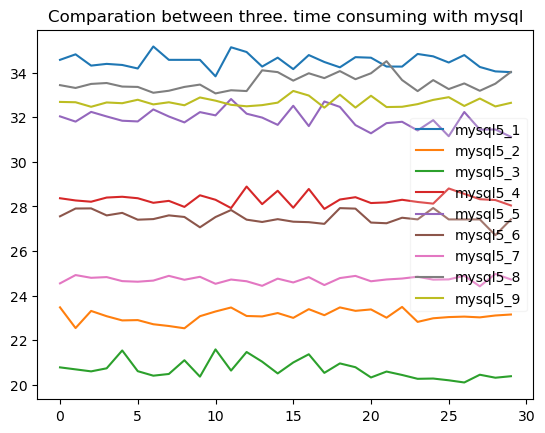

In [83]:
# those three   1~3 directly; 4~6 Like; 7~9 regexp;
plot_mysql(16,25,'Comparation between three.')
plt.show()

##### 5.1.2 comparation between operators in regexp and out of regexp

 It is obvious that operators in the regexp will take less time. try to run agian the data set, maybe has been run seperately.


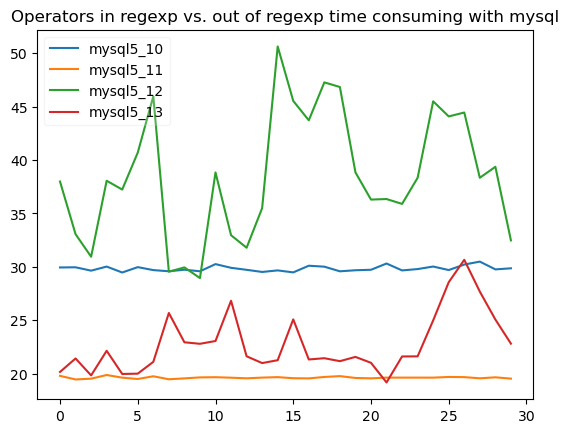

In [84]:
# The and operator here is not accurate, it's just a simulate.
print(" It is obvious that operators in the regexp will take less time.",'try to run agian the data set, maybe has been run seperately.') #try to run agian the data set, maybe hsa been run seperately.
plot_mysql(25,29,'Operators in regexp vs. out of regexp')
plt.show()

##### 5.1.3 Try to find relationships between with operations and run them seperatly.

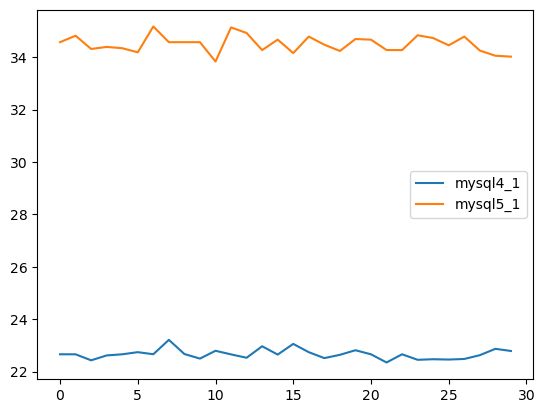

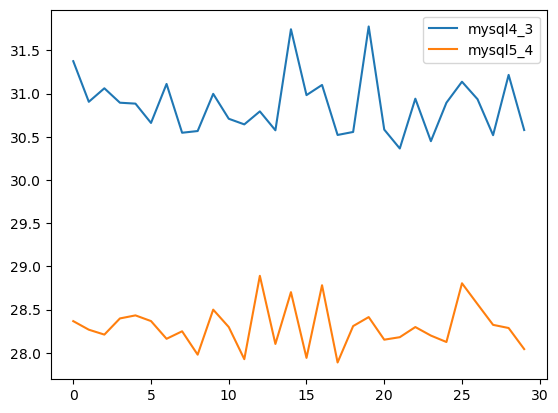

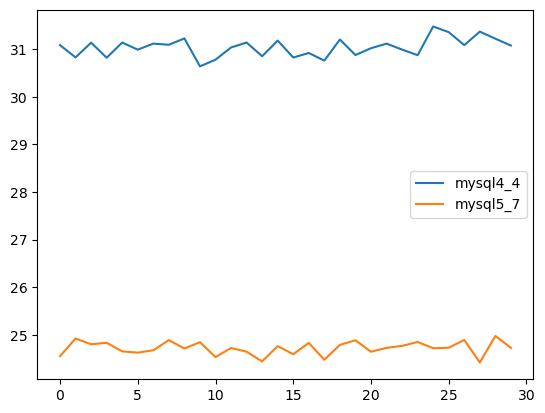

In [107]:
# not operator
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['5_1'],label = 'mysql5_1')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['5_4'],label = 'mysql5_4')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['5_7'],label = 'mysql5_7')
plt.legend()
plt.show()

# suppose there are some mistakes in the dataset?


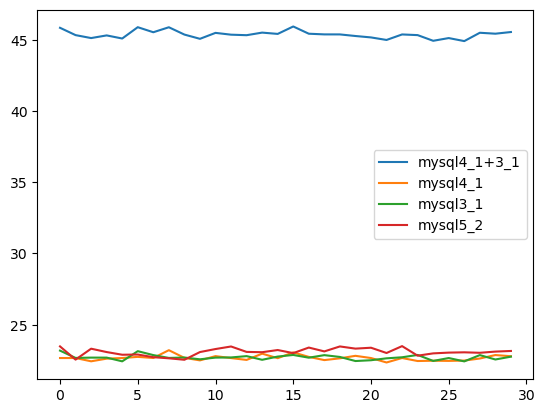

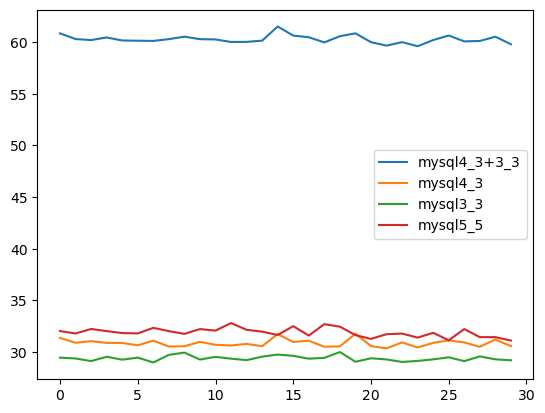

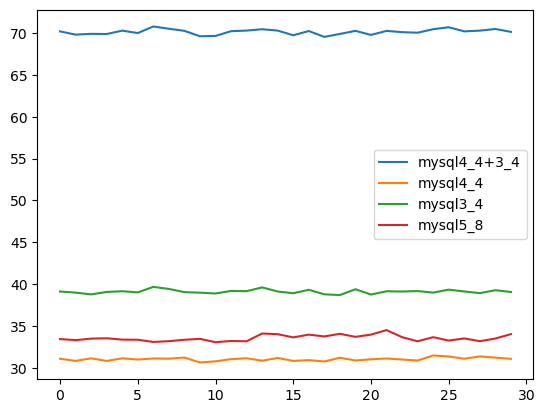

In [113]:
# or operation
plt.plot(df_mysql['4_1']+df_mysql['3_1'],label = 'mysql4_1+3_1')
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['3_1'],label = 'mysql3_1')
plt.plot(df_mysql['5_2'],label = 'mysql5_2')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3']+df_mysql['3_3'],label = 'mysql4_3+3_3')
plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['3_3'],label = 'mysql3_3')
plt.plot(df_mysql['5_5'],label = 'mysql5_5')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4']+df_mysql['3_4'],label = 'mysql4_4+3_4')
plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['3_4'],label = 'mysql3_4')
plt.plot(df_mysql['5_8'],label = 'mysql5_8')
plt.legend()
plt.show()

# haven't found the pattern yet, when one get satified the search whould stop? may not be simply we thought as 1+1.

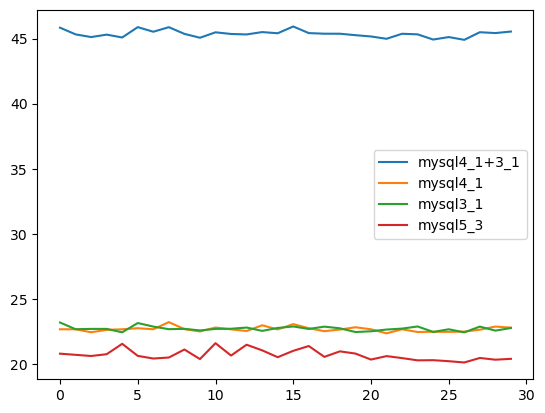

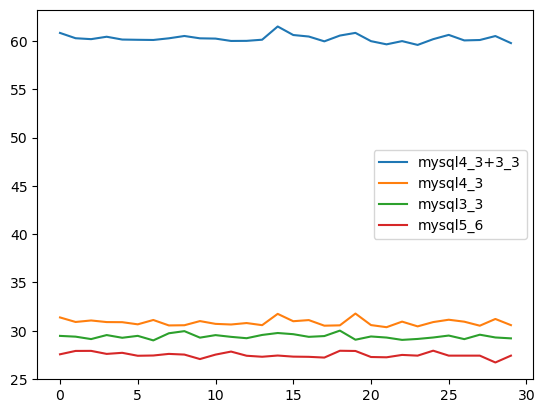

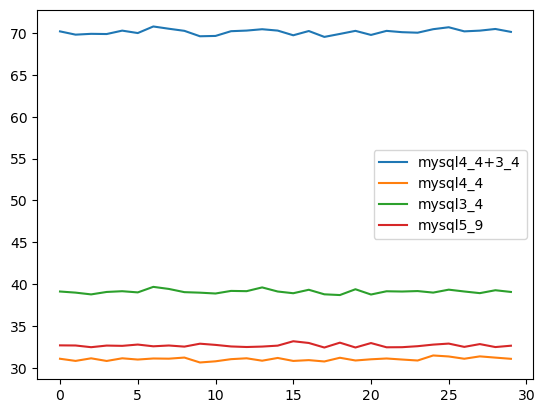

In [114]:
# and operator
plt.plot(df_mysql['4_1']+df_mysql['3_1'],label = 'mysql4_1+3_1')
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['3_1'],label = 'mysql3_1')
plt.plot(df_mysql['5_3'],label = 'mysql5_3')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3']+df_mysql['3_3'],label = 'mysql4_3+3_3')
plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['3_3'],label = 'mysql3_3')
plt.plot(df_mysql['5_6'],label = 'mysql5_6')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4']+df_mysql['3_4'],label = 'mysql4_4+3_4')
plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['3_4'],label = 'mysql3_4')
plt.plot(df_mysql['5_9'],label = 'mysql5_9')
plt.legend()
plt.show()

# again may be when do not satisfy the first judgement will stop the query? may not be simply we thought as 1+1.

##### 5.2 Mongo Part 5

##### 5.2.1 comparation within

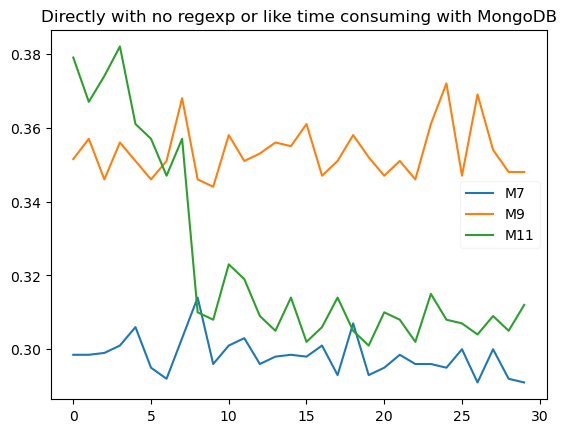

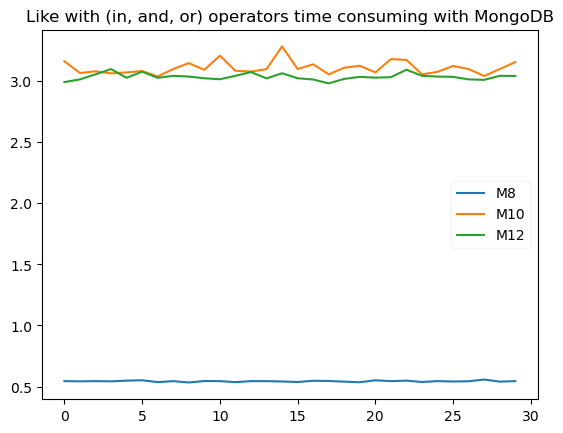

In [119]:
# directly with operator not, and, or
Plot_mongo(6,7,'Directly with no regexp or like')
Plot_mongo(8,9,'Directly with no regexp or like')
Plot_mongo(10,11,'Directly with no regexp or like')
plt.show()
# regexp with operator not, and, or
Plot_mongo(7,8,'Like with (in, and, or) operators')
Plot_mongo(9,10,'Like with (in, and, or) operators')
Plot_mongo(11,12,'Like with (in, and, or) operators')
plt.show()

##### 5.2.2 in and out of regexp

 It is obvious that operators in the regexp will take less time. try to run agian the data set, maybe has been run seperately.


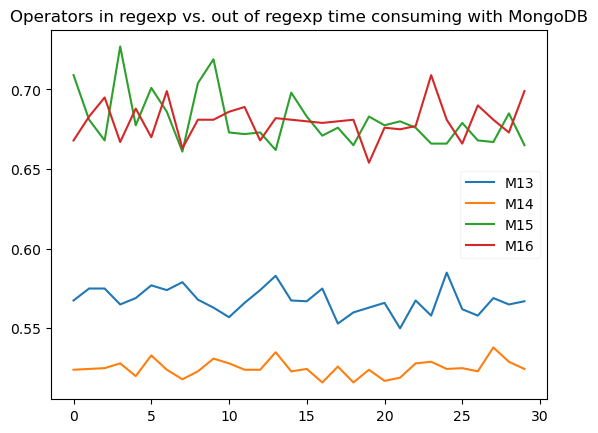

In [120]:
Plot_mongo(12,16,'Operators in regexp vs. out of regexp')
plt.show()

In [121]:
t_test(df_mongo_s['M15'],df_mongo_s['M16'])

0.6806333333333333 0.6800666666666668
t-statistic: 0.15158292043736485
p-value: 0.8800419309858152
There's no significant difference between two data set.


##### 5.2.3 run together with (not, and, or) operator and seperatly

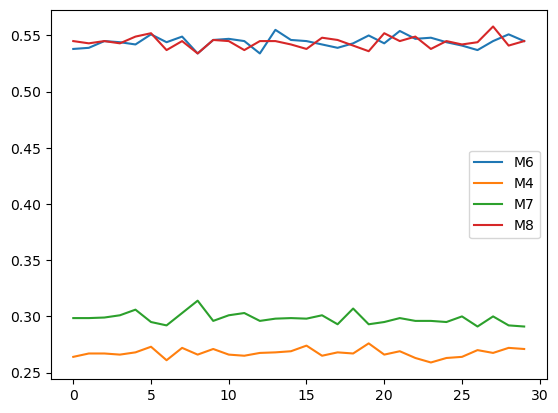

In [126]:
plt.plot(df_mongo_s['M6'], label = 'M6')
plt.plot(df_mongo_s['M4'], label = 'M4')
plt.plot(df_mongo_s['M7'], label = 'M7')
plt.plot(df_mongo_s['M8'], label = 'M8')
plt.legend()
plt.show()

In [127]:
t_test(df_mongo_s['M6'],df_mongo_s['M8'])

0.5444333333333334 0.5440333333333334
t-statistic: 0.30022654946866006
p-value: 0.765077815347802
There's no significant difference between two data set.


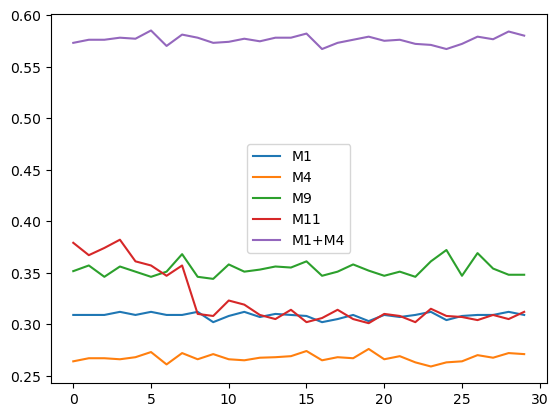

In [125]:
plt.plot(df_mongo_s['M1'], label = 'M1')
plt.plot(df_mongo_s['M4'], label = 'M4')
plt.plot(df_mongo_s['M9'], label = 'M9')
plt.plot(df_mongo_s['M11'], label = 'M11')
plt.plot(df_mongo_s['M1']+df_mongo_s['M4'], label = 'M1+M4')
plt.legend()
plt.show()

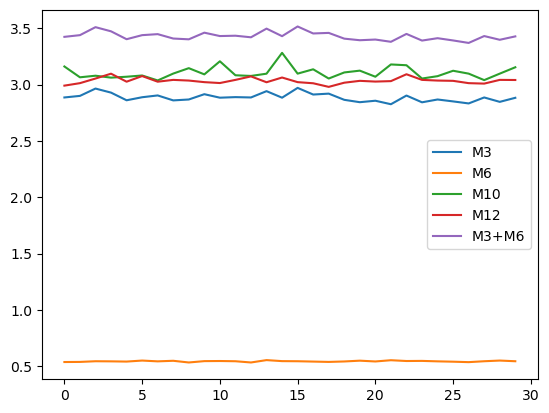

In [124]:
plt.plot(df_mongo_s['M3'], label = 'M3')
plt.plot(df_mongo_s['M6'], label = 'M6')
plt.plot(df_mongo_s['M10'], label = 'M10')
plt.plot(df_mongo_s['M12'], label = 'M12')
plt.plot(df_mongo_s['M3']+df_mongo_s['M6'], label = 'M3+M6')
plt.legend()
plt.show()

##### 5.3 between two database

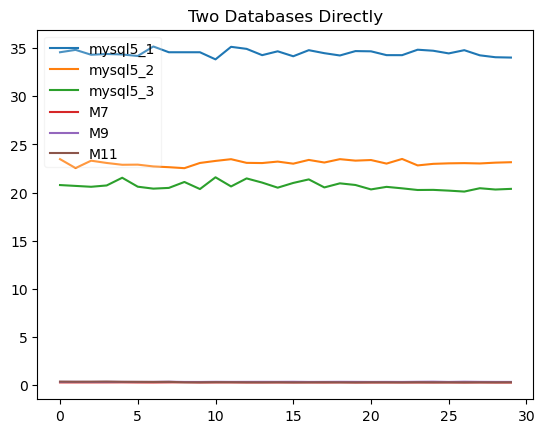

In [132]:
plot_mysql(16,19,'')
Plot_mongo(6,7,'')
Plot_mongo(8,9,'')
Plot_mongo(10,11,'')
plt.title('Two Databases Directly')
plt.show()

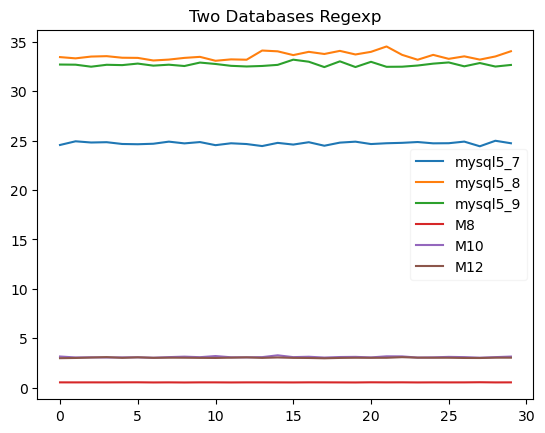

In [133]:
plot_mysql(22,25,'')
Plot_mongo(7,8,'')
Plot_mongo(9,10,'')
Plot_mongo(11,12,'')
plt.title('Two Databases Regexp')
plt.show()

### Part 6

##### 6.1 mysql Part

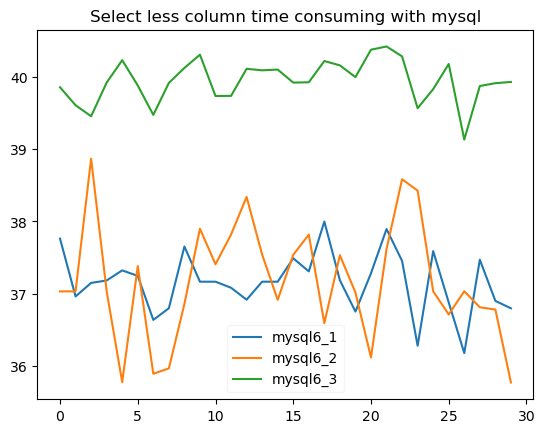

In [86]:
plot_mysql(29,32,'Select less column')
plt.show()

In [81]:
t_test(df_mysql['6_1'],df_mysql['6_2'])

37.16090442333333 37.171188435
t-statistic: -0.06160468537334466
p-value: 0.9510894463301623
There's no significant difference between two data set.


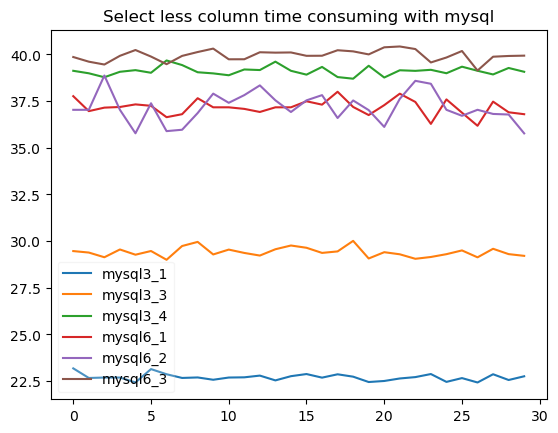

In [87]:
plot_mysql(8,9,'')
plot_mysql(10,12,'')
plot_mysql(29,32,'Select less column')
plt.show()

##### 6.2 Mongo Part

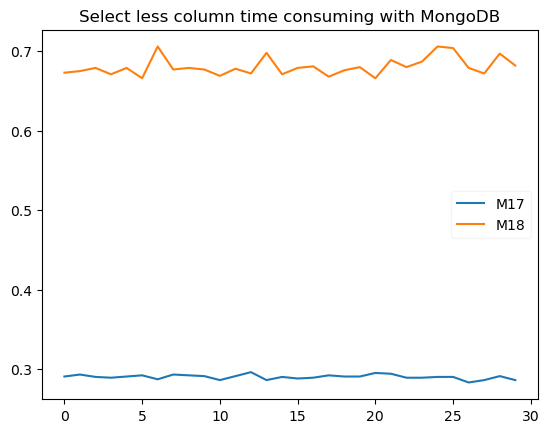

In [134]:
Plot_mongo(16,18,'Select less column')
plt.show()

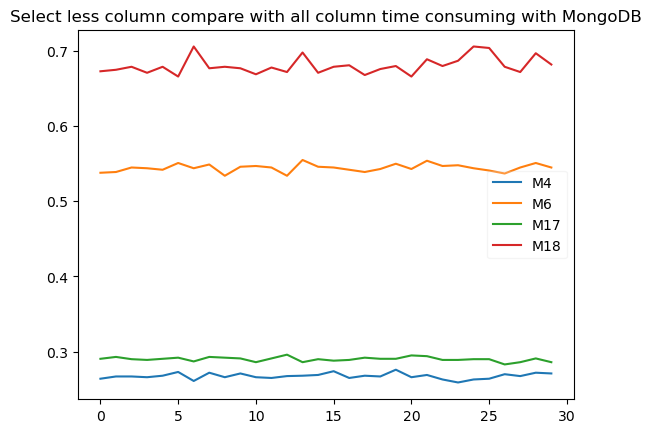

In [135]:
Plot_mongo(3,4,'')
Plot_mongo(5,6,'')
Plot_mongo(16,18,'Select less column compare with all column')
plt.show()

# The outcome is a bit confuse, try another data set.

##### 6.3 Comparation of two database

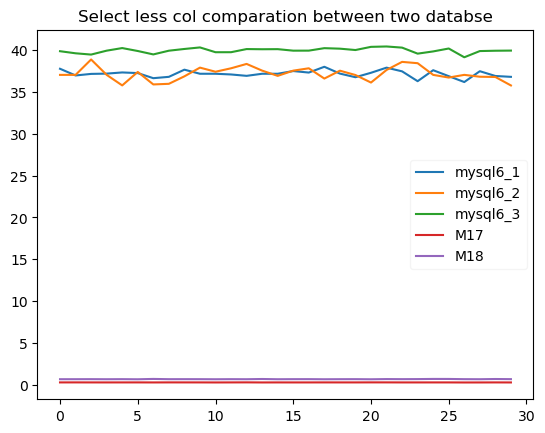

In [136]:
plot_mysql(29,32,'Select less column')
Plot_mongo(16,18,'Select less column compare with all column')
plt.title('Select less col comparation between two databse')
plt.show()

### Part 7

##### 7.1 mysql part

The times of the two col is about 9.849092139445387


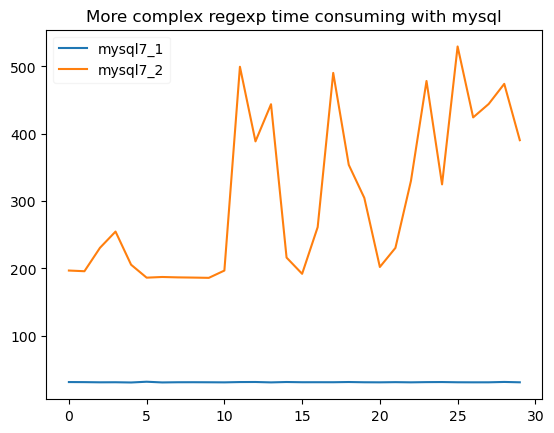

In [137]:
print('The times of the two col is about {}'.format(df_mysql['7_2'].mean()/df_mysql['7_1'].mean()))

plot_mysql(32,34,'More complex regexp')
plt.show()

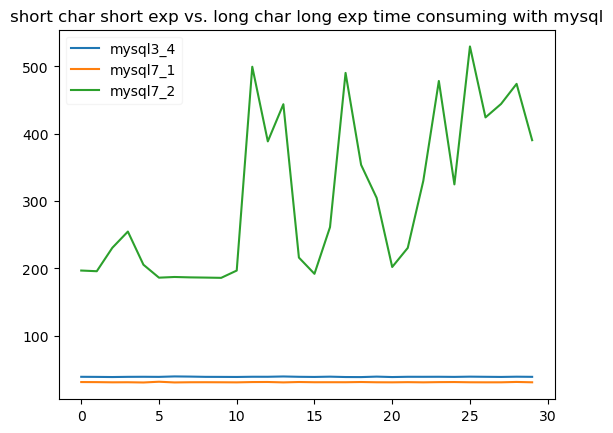

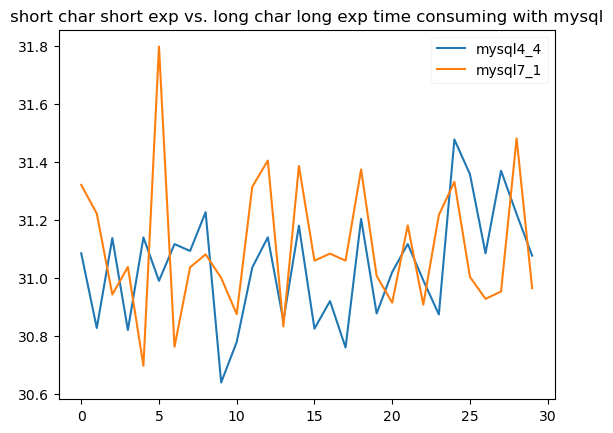

In [101]:
plot_mysql(11,12,'')
plot_mysql(32,34,'short char short exp vs. long char long exp')  
plt.show()
plot_mysql(15,16,'')
plot_mysql(32,33,'short char short exp vs. long char long exp')  
plt.show()

In [98]:
t_test(df_mysql['4_4'],df_mysql['7_1'])

31.04246746 31.107098283333325
t-statistic: -1.1422301158057748
p-value: 0.2580519163927583
There's no significant difference between two data set.


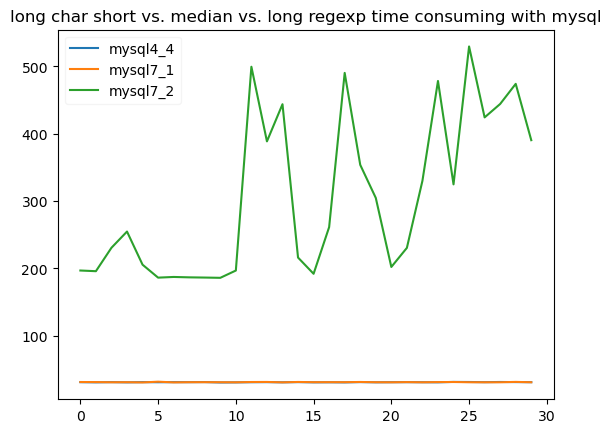

In [100]:
plot_mysql(15,16,'')
plot_mysql(32,34,'long char short vs. median vs. long regexp') 
plt.show()

##### 7.2 Mongo Part

In [139]:
print(df_mongo_s.columns)

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11',
       'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20'],
      dtype='object')


The times of the two col is about 4.381215378255477


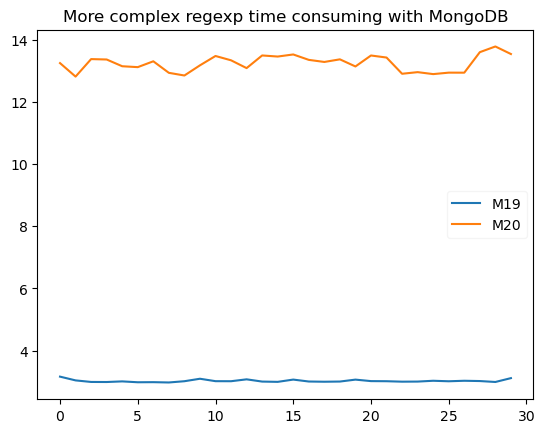

In [143]:
print('The times of the two col is about {}'.format(1/(df_mongo_s['M19'].mean()/df_mongo_s['M20'].mean())))
Plot_mongo(18,20,'More complex regexp')
plt.show()

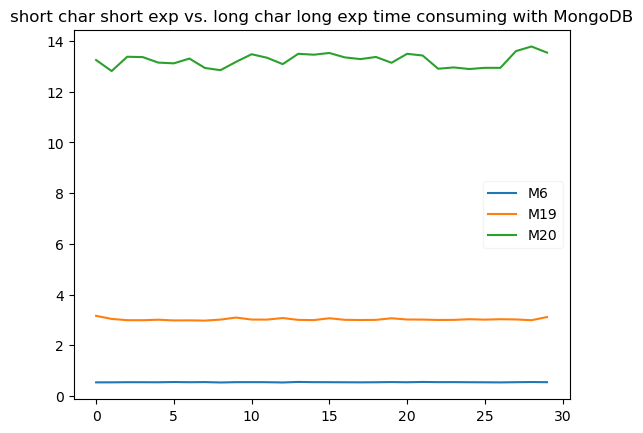

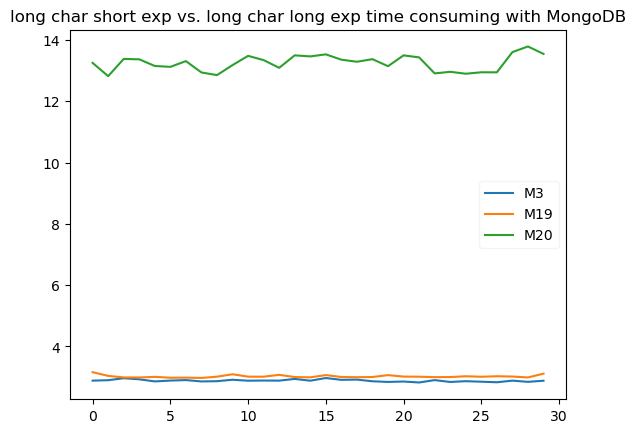

In [144]:
Plot_mongo(5,6,'')
Plot_mongo(18,20,'short char short exp vs. long char long exp')  
plt.show()
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char short exp vs. long char long exp')  
plt.show()

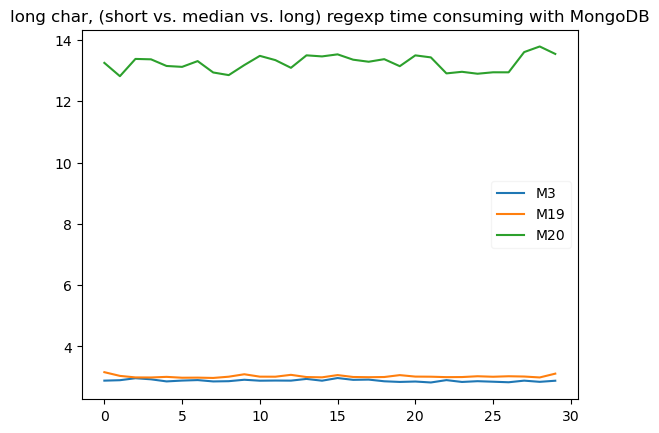

In [145]:
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.show()

##### 7.3 Comparation between two database

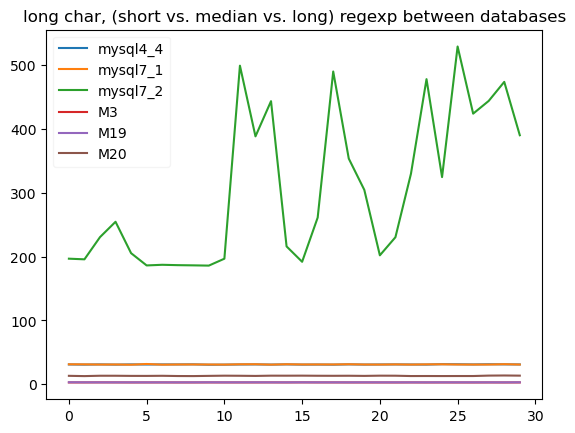

In [146]:
plot_mysql(15,16,'')
plot_mysql(32,34,'long char short vs. median vs. long regexp') 
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.title('long char, (short vs. median vs. long) regexp between databases')
plt.show()

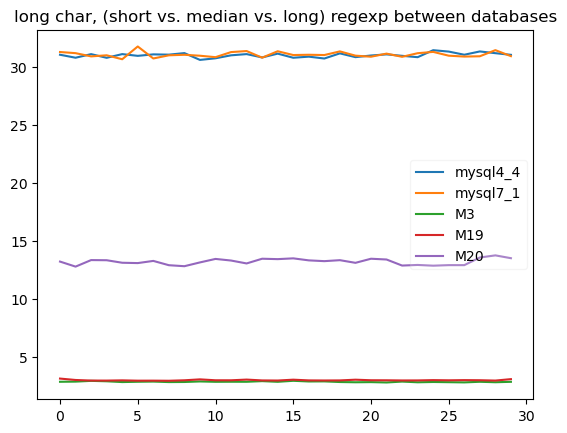

In [147]:
plot_mysql(15,16,'')
plot_mysql(32,33,'long char short vs. median vs. long regexp') 
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.title('long char, (short vs. median vs. long) regexp between databases')
plt.show()